# Demo_1

In [1]:
!pip install gwpy pycbc ligo-common

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━

**1. Setting up the Environment** 🧪

This initial step is crucial for preparing our analysis environment. We are installing three key Python libraries:

* `gwpy`: A powerful, high-level package designed for handling gravitational-wave time-series data. We will use it for data acquisition, plotting, and some aspects of noise analysis.
* `pycbc`: The core library for our analysis. It provides a comprehensive suite of tools for gravitational-wave signal processing, including functions for generating theoretical waveform templates and performing the matched-filter search itself.
* `ligo-common`: Contains common utilities and is a required dependency for `PyCBC`.

By installing these, we are equipping our notebook with the same specialized software used by scientists in the LIGO-Virgo-KAGRA (LVK) collaboration, ensuring our analysis is built on a foundation of well-tested and scientifically validated tools.

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


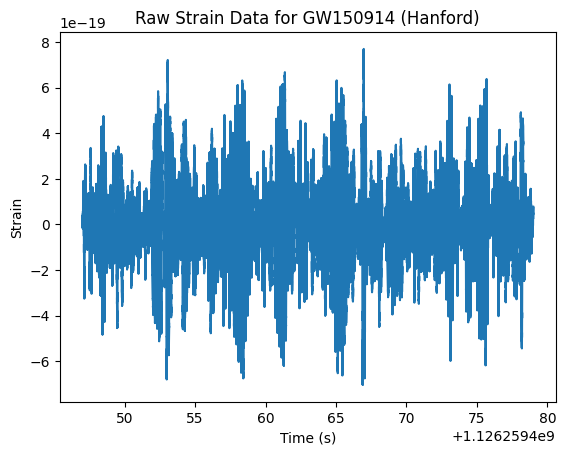

In [2]:
import pylab
from pycbc.catalog import Merger
from pycbc.filter import highpass, resample_to_delta_t
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.waveform import get_td_waveform
from pycbc.filter import matched_filter
merger = Merger("GW150914")
strain = merger.strain('H1')
pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.title('Raw Strain Data for GW150914 (Hanford)')
pylab.show()

 **Conceptual Overview: Accessing the Raw Data** 📥

This initial step involves importing the necessary libraries and accessing the raw data for our analysis.

* **PyCBC Library**: We begin by importing a suite of functions from `pycbc`, the core library for our analysis. This package provides the specialized tools required for gravitational-wave signal processing, from data retrieval to the final filtering. We also import `pylab` for plotting our results.

* **Data Retrieval**: The line `merger = Merger("GW150914")` uses a high-level utility within PyCBC that simplifies access to public data from the Gravitational-Wave Open Science Center (GWOSC). By specifying the official event name "GW150914", we are pointing to the first-ever direct detection of gravitational waves. We then retrieve the data from the Hanford detector (`'H1'`).

* **Strain Data**: The raw output from a LIGO detector is a time-series of **strain**, which represents the fractional change in the length of the detector's arms ($h(t) = \Delta L/L$). This data contains the faint signature of a gravitational wave buried within instrumental and environmental noise.

* **Initial Visualization**: The plot of the raw strain data is a critical first look. It immediately reveals that the potential signal is completely obscured by overwhelming, low-frequency noise. This highlights the fundamental challenge of gravitational-wave astronomy and demonstrates why sophisticated signal processing techniques are essential for any discovery.

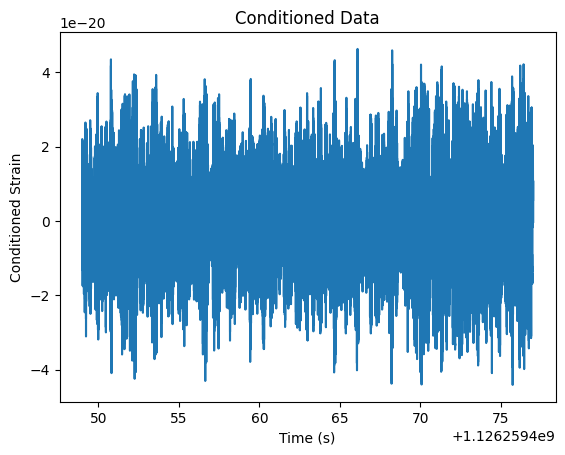

In [3]:
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)
conditioned = strain.crop(2, 2)
pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.ylabel('Conditioned Strain')
pylab.title('Conditioned Data')
pylab.show()

**Conceptual Overview: Data Conditioning** ⚙️

Before searching for a signal, the raw data must be "conditioned." This critical pre-processing stage cleans the data to make it suitable for analysis and computationally manageable.

* **High-pass Filtering**: We apply a **high-pass filter** to remove all frequency content below 15 Hz. This is essential because LIGO detectors are dominated by intense noise at low frequencies, caused by sources like seismic activity and thermal fluctuations. This noise can overwhelm the analysis and introduce numerical artifacts, so it must be filtered out.

* **Resampling**: The original data is sampled at a very high rate (often 16384 Hz). We **downsample** it to 2048 Hz. This is done for **computational efficiency**. According to the **Nyquist-Shannon sampling theorem**, a sampling rate of 2048 Hz is more than sufficient to faithfully represent the GW150914 signal (which has frequencies up to a few hundred Hz). By reducing the number of data points, we make all subsequent calculations significantly faster without losing any relevant information.

* **Cropping Data**: Digital filters can create unwanted transient effects at the very beginning and end of a time series. We **crop** the data to remove the first and last two seconds, ensuring these filter-induced artifacts are discarded and do not contaminate our analysis.

The resulting plot shows a much cleaner time series. However, the gravitational-wave signal itself is still not visible by eye, buried deep within the remaining random noise.

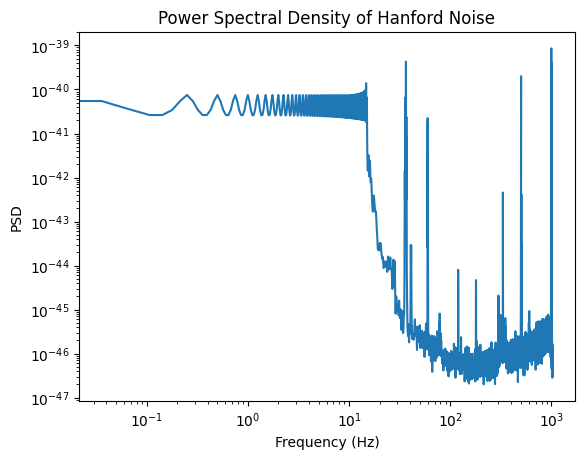

In [4]:
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)
pylab.loglog(psd.sample_frequencies, psd)
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('PSD')
pylab.title('Power Spectral Density of Hanford Noise')
pylab.show()

**Conceptual Overview: Characterizing the Noise** 📊

Matched filtering is only optimal when the statistical properties of the detector's noise are well understood. This cell's purpose is to calculate the **Power Spectral Density (PSD)**, which provides a mathematical description of the noise.

* **What is the PSD?**: The PSD describes how the power of the detector's noise is distributed across different frequencies. A high PSD value at a certain frequency means the detector is very noisy there. Knowing this allows us to "whiten" the data during the search—a process that de-emphasizes the frequency bands where the detector is noisy and amplifies the bands where it is most sensitive. An accurate PSD estimate is the most critical ingredient for a successful matched-filter search.

* **Welch's Method**: We use Welch's method (`conditioned.psd(4)`) to get a stable estimate of the PSD. Instead of just taking one Fourier transform of the entire dataset (which would be very noisy), this method breaks the data into overlapping 4-second segments, calculates the PSD for each, and then averages them. This averaging process dramatically reduces the variance of the estimate, giving us a much more reliable picture of the average noise behavior.

* **Technical Refinements**: The `interpolate` and `inverse_spectrum_truncation` steps are technical necessities. We interpolate the PSD so that its frequency resolution matches our data. We truncate the low-frequency end to prevent numerical issues from the frequency region that we have already filtered out of the time-domain data.

The resulting **log-log plot** is the standard way to view a detector's noise spectrum, often called its "sensitivity curve." The "u" shape shows that the detector is most sensitive (has the lowest noise) in the range of about 100-300 Hz.

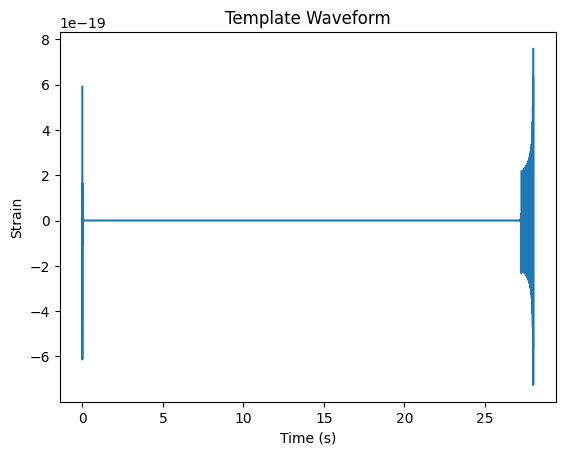

In [5]:

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=36,
                         mass2=29,
                         delta_t=conditioned.delta_t,
                         f_lower=20)
hp.resize(len(conditioned))
template = hp.cyclic_time_shift(hp.start_time)
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.title('Template Waveform')
pylab.show()

**Conceptual Overview: Creating the Search Template** 🎯

The core principle of matched filtering is to cross-correlate the data with a theoretical model of the signal we expect to find. This cell generates that model, known as a **template**.

* **Waveform Models from General Relativity**: We cannot write down a simple equation for the signal from two merging black holes. Instead, we use sophisticated models called **approximants** that provide highly accurate solutions to Einstein's equations. Here, we use `SEOBNRv4_opt`, a state-of-the-art model that simulates the entire **inspiral, merger, and ringdown** (IMR) of the binary black hole system.

* **Source Parameters**: The function `get_td_waveform` creates the template based on the physical parameters of the source. Since we are looking for the known event GW150914, we input its known component **masses** (approximately 36 and 29 solar masses). In a real search for an unknown signal, we would generate a large **"template bank"** with thousands of different templates to cover a wide range of possible masses and spins.

* **Waveform Polarizations**: The function returns two outputs, `hp` and `hc`, which correspond to the two polarizations of a gravitational wave: **plus ($h_+$) and cross ($h_\times$)**. For this analysis, we only need to use one polarization.

* **Technical Alignment**: The `resize` and `cyclic_time_shift` functions are technical steps to prepare the template for the filtering algorithm. The template is resized to match the length of our data segment, and it is shifted in time so that the merger peak occurs at the correct position for the `matched_filter` function to work properly.

The final plot shows the beautiful, characteristic **"chirp" signal** of a binary merger: a wave that increases in both amplitude and frequency as the black holes spiral together and merge.

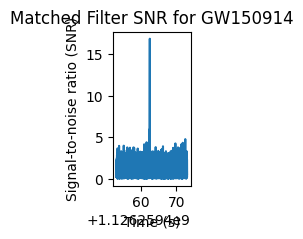

Found a signal at time 1126259462.4262695 with SNR 16.84


In [6]:
snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4, 4)
pylab.figure(figsize=[1, 2])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise ratio (SNR)')
pylab.xlabel('Time (s)')
pylab.title('Matched Filter SNR for GW150914')
pylab.show()
peak = abs(snr).numpy().argmax()
snr_peak = snr[peak]
time_peak = snr.sample_times[peak]
print(f"Found a signal at time {time_peak} with SNR {abs(snr_peak):.2f}")

**Conceptual Overview: Performing the Matched Filter and Making a Detection** ✅

This is the culmination of our analysis. This cell executes the search and identifies the signal, bringing all the previous steps—data conditioning, noise characterization, and template generation—together.

* **The `matched_filter` Function**: This function performs the core operation. For computational efficiency, the process is handled in the frequency domain:
    1.  It takes the Fourier transform of both the detector data and our template waveform.
    2.  It **"whitens"** the data by dividing the data's frequency representation by the Power Spectral Density (PSD). This is the crucial step where our noise characterization pays off, as it suppresses frequency bands where the detector is noisy and amplifies the bands where it is sensitive.
    3.  It multiplies the whitened data by the template and performs an inverse Fourier transform.
    The result of this cross-correlation is a new time series representing the **Signal-to-Noise Ratio (SNR)**.

* **Signal-to-Noise Ratio (SNR)**: The SNR is a measure of how well the template matches the data at any given point in time, relative to the expected level of the noise. A large peak in the SNR time series indicates a high probability that a signal matching our template is present in the data at that specific moment.

* **Identifying the Peak**: The final part of the code finds the maximum value in the SNR series. The time of this peak corresponds to the arrival time of the gravitational wave, and the value of the peak is its measured SNR. An SNR value significantly greater than the surrounding noise (like the one found here) constitutes a confident detection.

The final output confirms that we have successfully found the GW150914 signal buried within the detector noise, achieving the primary goal of this project.

# Demo_2


In [8]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Fetch 1024 seconds of data from LIGO Livingston (L1)
# We'll use a time segment around GW150914
gps_start = 1126259446 # Just before GW150914
gps_end = gps_start + 1024
ldata = TimeSeries.fetch_open_data('L1', gps_start, gps_end)

**Conceptual Overview: Acquiring Data for Noise Analysis** 📡

This project focuses on characterizing the noise in a gravitational-wave detector, a critical task for any real-world analysis. This first cell sets the stage by acquiring the necessary data.

* **The `gwpy` Library**: We begin by importing the `TimeSeries` object from `gwpy`. This is a powerful, high-level library designed specifically for handling and processing gravitational-wave time-series data. It provides convenient methods for data acquisition, filtering, and visualization.

* **Data Selection**: We download **1024 seconds** of data from the LIGO Livingston (`L1`) detector. A long duration is chosen because a robust statistical analysis of noise requires a large sample of data. By analyzing a long stretch, we can get a much better average picture of the detector's behavior than we would from a short segment.

* **GPS Time**: The start and end times are specified in **GPS Time**, the standard high-precision time format used by the LIGO-Virgo-KAGRA collaborations.

* **The `TimeSeries` Object**: The data is loaded into a `gwpy` `TimeSeries` object. This is more than just an array of numbers; it's a specialized data structure that intelligently bundles the strain values with essential metadata like the start time, sampling rate, and channel name, making the data much easier to manage and analyze.

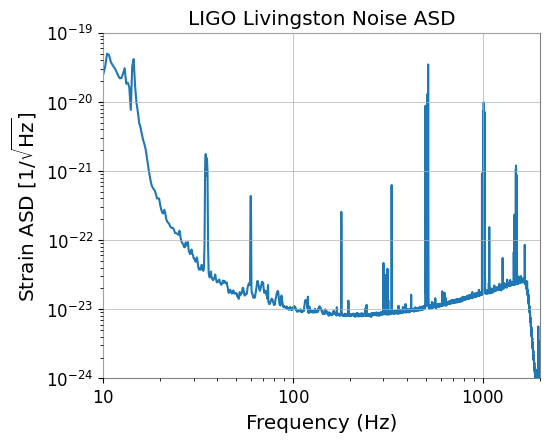

In [9]:
asd = ldata.asd(fftlength=4, method='welch')
plot = asd.plot()
ax = plot.gca()
ax.set_xlim(10, 2000)
ax.set_ylim(1e-24, 1e-19)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r'Strain ASD [$1/\sqrt{\mathrm{Hz}}$]')
ax.set_title('LIGO Livingston Noise ASD')
plot.show()

**Conceptual Overview: Visualizing Average Noise Sensitivity** 📈
This cell calculates and plots the **Amplitude Spectral Density (ASD)**, a standard diagnostic plot in gravitational-wave astronomy that shows the average sensitivity of the detector as a function of frequency.
* **Amplitude Spectral Density (ASD)**: The ASD is the square root of the Power Spectral Density (PSD) and has units of strain per root-Hertz ($1/\sqrt{\mathrm{Hz}}$). The resulting curve is the effective **"sensitivity curve"** of the detector. A lower ASD value means the detector is more sensitive (i.e., less noisy) at that frequency. We again use **Welch's method** to average over many 4-second data segments, producing a smooth and statistically robust estimate of the spectrum.
* **Interpreting the Plot**: The ASD is extremely useful for identifying persistent instrumental noise sources. The plot clearly shows a "U" shape, representing the frequency band where LIGO is most sensitive. More importantly, it reveals several sharp, high-power peaks known as **spectral lines**. These are not astrophysical signals but are artifacts of the instrument itself. The most prominent lines at **60 Hz, 120 Hz, and 180 Hz** are caused by interference from the AC electrical power grid. Identifying these features is a key part of data quality assessment and demonstrates an understanding of the challenges of working with real-world detector data.

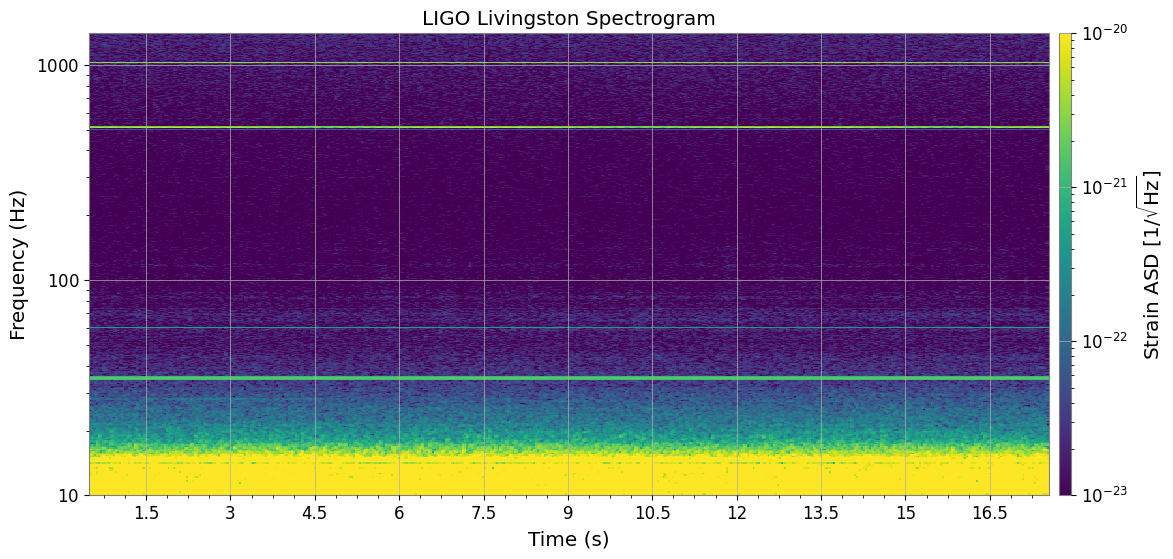

In [10]:
specgram = ldata.spectrogram2(fftlength=4, overlap=2) ** (1/2.)
plot = specgram.plot(norm='log', vmin=1e-23, vmax=1e-20)
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('LIGO Livingston Spectrogram')
ax.colorbar(label=r'Strain ASD [$1/\sqrt{\mathrm{Hz}}$]')
plot.show()

**Conceptual Overview: Visualizing Time-Varying Noise** 🖼️

While the ASD provides an average picture of the noise, a **spectrogram** reveals its dynamic nature, showing how the detector's frequency content changes over time. This is a fundamental tool in **time-frequency analysis**.

* **The Spectrogram**: A spectrogram is created by breaking the data into short, overlapping time segments (here, 4-second segments with a 2-second overlap) and calculating the ASD for each one. These individual spectra are then stacked side-by-side to create a 2D image where the x-axis is time, the y-axis is frequency, and the color represents the noise amplitude at that specific time and frequency.

* **Interpreting the Plot**: The spectrogram provides critical insights that the averaged ASD cannot:
    * **Instrumental Lines**: The persistent spectral lines we saw in the ASD (e.g., at 60 Hz) now appear as bright, continuous **horizontal lines**, confirming they are always present.
    * **Non-stationarity**: You can see that the background color of the plot is not uniform but fluctuates over time. This shows that the overall noise level of the detector is not constant, a property known as **non-stationarity**.
    * **Glitches**: Most importantly, the spectrogram is the primary tool for spotting transient noise events known as **"glitches."** These are short-duration, excess-power events that appear as bright **vertical lines or "blips."** Glitches are a major challenge in data analysis as they can sometimes mimic true astrophysical signals.

This visualization powerfully demonstrates the complex and dynamic reality of gravitational-wave detector data, a critical insight for any data analyst in the field.